### Hashtag: sb49

#### Problem 1.2

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime as dt
import time
import pytz
from itertools import compress
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

def reg_m(y, x):
    X = sm.add_constant(x)
    results = sm.regression.linear_model.OLS(y, X).fit()
    return results

hashtag = 'sb49'
data = {}
file_path = 'tweets_#' + hashtag + '.txt' 
tweets_firstpost_date = []
tweets_title = []
tweets_tweet = []
tweets_metrics = []
tweets_file = open(file_path, "rt" )
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_firstpost_date.append(tweet['firstpost_date'])
        tweets_tweet.append(tweet['tweet'])
        tweets_title.append(tweet['title'])
        tweets_metrics .append(tweet['metrics'])
    except:
        continue
    
tweets = pd.DataFrame()
tweets['firstpost_date'] = tweets_firstpost_date
tweets['tweet'] = tweets_tweet
tweets['title'] = tweets_title
tweets['metrics'] = tweets_metrics
Tweet_details = pd.DataFrame.from_records(tweets['tweet'])
Metrics = pd.DataFrame.from_records(tweets['metrics'])

tweet_user = []
for elements in Tweet_details['user']:
    tweet_user.append(elements)
tweet_user = pd.DataFrame(tweet_user)


tweet_initial = 1420102800
tweet_final = tweets.firstpost_date[len(tweets.firstpost_date)-1]
n_bins = int(math.ceil((tweet_final - tweet_initial)/3600)+1)

tweet_initial = [dt.fromtimestamp(1420102800).month,
                     dt.fromtimestamp(1420102800).day,
                     dt.fromtimestamp(1420102800).hour]
Time_stamps = []
for x in tweets['firstpost_date']:
   Time_stamps.append([dt.fromtimestamp(x).month,  dt.fromtimestamp(x).day,  dt.fromtimestamp(x).hour,
                       dt.fromtimestamp(x).year])
print('done')

C:\Users\tians\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


done


In [2]:
#problem 1.2
print("-------------problem_1_2--------------")
n_tweets = np.zeros((n_bins,1))
n_retweets = np.zeros((n_bins,1))
n_followers = np.zeros((n_bins,1))
max_followers = np.zeros((n_bins,1))
n_hours = np.zeros((n_bins,1))
day_of_week = np.zeros((n_bins,1))
index = 0
for Time in Time_stamps:
    if (Time[3]>2014):
        index_2 = (Time[0]-tweet_initial[0])*31*24 + (Time[1]-tweet_initial[1])*24 + (Time[2]-tweet_initial[2])
        n_tweets[index_2] += 1
        n_retweets[index_2] += Tweet_details.retweet_count[index]
        n_followers[index_2] += tweet_user.followers_count[index]
        max_followers[index_2] = max(tweet_user.followers_count[index], max_followers[index_2])
    index +=1
for i in range (0,n_bins):
    n_hours[i] = (i+tweet_initial[2]) % 24 
    day_of_week[i] = (np.ceil((i+12) / 24)+4) % 7
features_1 = np.concatenate((n_hours[0:-1], n_tweets[0:-1], n_retweets[0:-1], n_followers[0:-1], max_followers[0:-1] ), axis=1)

# number of tweets for the nect hours
target = n_tweets[1:len(n_tweets)] 


new_model = reg_m(target, features_1)
print('hastag #', hashtag)
print(new_model.summary())

-------------problem_1_2--------------
hastag # sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     740.9
Date:                Sun, 18 Mar 2018   Prob (F-statistic):          1.35e-314
Time:                        17:00:29   Log-Likelihood:                -8628.1
No. Observations:                 898   AIC:                         1.727e+04
Df Residuals:                     892   BIC:                         1.730e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

#### Problem 1.3

In [3]:
#problem 1_3 adding new features 
print("-------------problem_1_3--------------")
hashes = []
for elements in Tweet_details['entities']:
    hashes.append(elements)
Hashtags = pd.DataFrame.from_records(hashes)
hashtags_per_tweet = np.zeros((len(tweets),1))
x = 0
for elements in Hashtags.hashtags:
    for elements2 in elements:
        hashtags_per_tweet[x] += 1
    x = x+1
    
n_hashtags = np.zeros((n_bins,1))
sum_favourited = np.zeros((n_bins,1))
sum_friends = np.zeros((n_bins,1))
n_verified_users = np.zeros((n_bins,1))
sum_citations = np.zeros((n_bins,1))
sum_ranking_score = np.zeros((n_bins,1))
sum_statuses_count = np.zeros((n_bins,1))
sum_influential = np.zeros((n_bins,1))
sum_matching = np.zeros((n_bins,1))


index = 0
for Time in Time_stamps:
    if (Time[3]>2014):
        idx = (Time[0]-tweet_initial[0])*31*24 + (Time[1]-tweet_initial[1])*24 + (Time[2]-tweet_initial[2])
        n_hashtags[idx] += hashtags_per_tweet[index]
        sum_favourited[idx] += Tweet_details.favorite_count[index]
        sum_friends[idx] += tweet_user.friends_count[index]
        n_verified_users[idx] += tweet_user.verified[index]*1
        sum_citations[idx] += tweets.metrics[index]['citations']['total']
        sum_ranking_score[idx] += tweets.metrics[index]['ranking_score'] 
        sum_influential[idx] += tweets.metrics[index]['citations']['influential']
        sum_matching[idx] += tweets.metrics[index]['citations']['matching']
        sum_statuses_count[idx] += tweet_user.statuses_count[index]
        
    index +=1
    
    
    
new_features = np.concatenate((n_tweets[0:-1], n_retweets[0:-1],n_followers[0:-1],
                                 n_hashtags[0:-1], sum_favourited[0:-1],sum_friends[0:-1],
                                 n_verified_users[0:-1], sum_citations[0:-1], sum_ranking_score[0:-1], 
                                 sum_influential[0:-1],sum_matching[0:-1],
                                 sum_statuses_count[0:-1]), axis=1)

new_model2 = reg_m(target, new_features)
print('hastag #', hashtag)
print(new_model2.summary())

-------------problem_1_3--------------
hastag # sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     506.9
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:03:01   Log-Likelihood:                -8437.8
No. Observations:                 898   AIC:                         1.690e+04
Df Residuals:                     885   BIC:                         1.696e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\tians\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


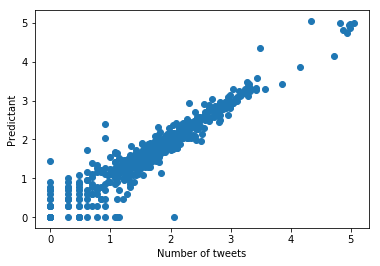

C:\Users\tians\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


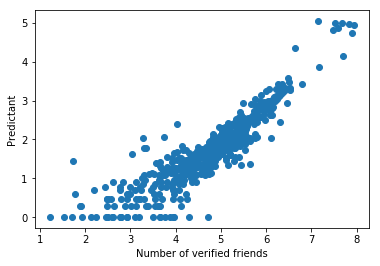

C:\Users\tians\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


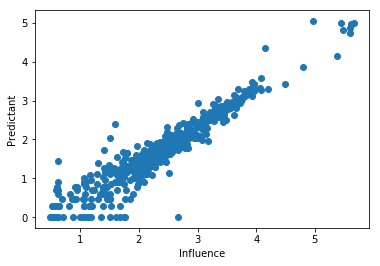

In [4]:
# pick 3 most significant features: 
plt.clf()
plt.scatter(np.log10(new_features[0:,0]),np.log10(target))
plt.xlabel('Number of tweets')
plt.ylabel('Predictant')
plt.show()

plt.clf()
plt.scatter(np.log10(new_features[0:,5]),np.log10(target))
plt.xlabel('Number of verified friends')
plt.ylabel('Predictant')
plt.show()


plt.clf()
plt.scatter(np.log10(new_features[0:,8]),np.log10(target))
plt.xlabel('Influence')
plt.ylabel('Predictant')
#plt.axis('equal')
plt.show()